In [72]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler

import warnings
from warnings import filterwarnings
filterwarnings('ignore')

The data for this analysis cames in two types of files:
- JSON Files: 
- CSV Files:

In [44]:
# get files
files = os.listdir(r'youtube_category_data')
files

['MXvideos.csv',
 '.DS_Store',
 'INvideos.csv',
 'DEvideos.csv',
 'category_id.json',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [4]:
# separate files
files_csv = [file for file in files if '.csv' in file]
files_json = [file for file in files if '.json' in file]

In [11]:
# create a dataset with all csv files
path = r'youtube_category_data'

dataset = pd.DataFrame()

for file in files_csv:
    current_df = pd.read_csv(path+'/'+file , encoding='iso-8859-1')
    
    dataset = pd.concat([dataset , current_df] , ignore_index=True)


In [12]:
dataset.shape

(375942, 16)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

In [15]:
# check for nulls
dataset.isnull().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
dtype: int64

As the only null values are in the description, we'll keep those rows.

In [17]:
# check for duplicates
dataset[dataset.duplicated()].shape

(36417, 16)

In [18]:
# drop duplicates
dataset = dataset.drop_duplicates()
dataset.shape

(339525, 16)

In [21]:
# Let's save the dataset in case we need to use it some other time

# csv
dataset.to_csv(r'youtube_dataset.csv' , index=False)

In [22]:
# json
dataset.to_json(r'youtube_dataset.json')

In [33]:
# get category data
category_df = pd.read_json(r'youtube_category_data/category_id.json')
category_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

## 1. Which Category has the most likes?

In [42]:
# create a dictionary that can match category id with the category name
category_dict = {}

for item in category_df['items'].values:
    category_dict[int(item['id'])] = item['snippet']['title']
    
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [43]:
# add to dataset category names for each row
dataset['category_name'] = dataset['category_id'].map(category_dict)

dataset.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style


In [49]:
cat_likes = dataset[['category_name','likes']]

In [115]:
cat_likes = cat_likes.groupby('category_name').sum().sort_values(by=['likes'],ascending=False).reset_index()
cat_likes.head(3)

,category_name,likes
0,Music,5867826278
1,Entertainment,2377832055
2,Comedy,931444449


The top 3 most liked categories are:
- Music
- Entertainment
- Comedy

In [178]:
import plotly.graph_objs as go
from plotly.offline import iplot

bar_plot = go.Bar(x=cat_likes['category_name'][:10] , y=cat_likes['likes'][:10])
iplot([bar_plot])

## 2. Is the the audience engaged?

In order to calculate engagement, we'll calculate the rates of likes, dislikes, and count of comments 

In [84]:
dataset['like_rate'] = (dataset['likes']/dataset['views'])*100
dataset['dislike_rate'] = (dataset['dislikes']/dataset['views'])*100
dataset['comment_count_rate'] = (dataset['comment_count']/dataset['views'])*100

In [85]:
dataset.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment,1.348467,0.116403,0.592010
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs,0.258164,0.165758,0.351522
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics,7.426652,0.195496,0.446114


Text(0.5, 1.0, 'Comment Count vs Views')

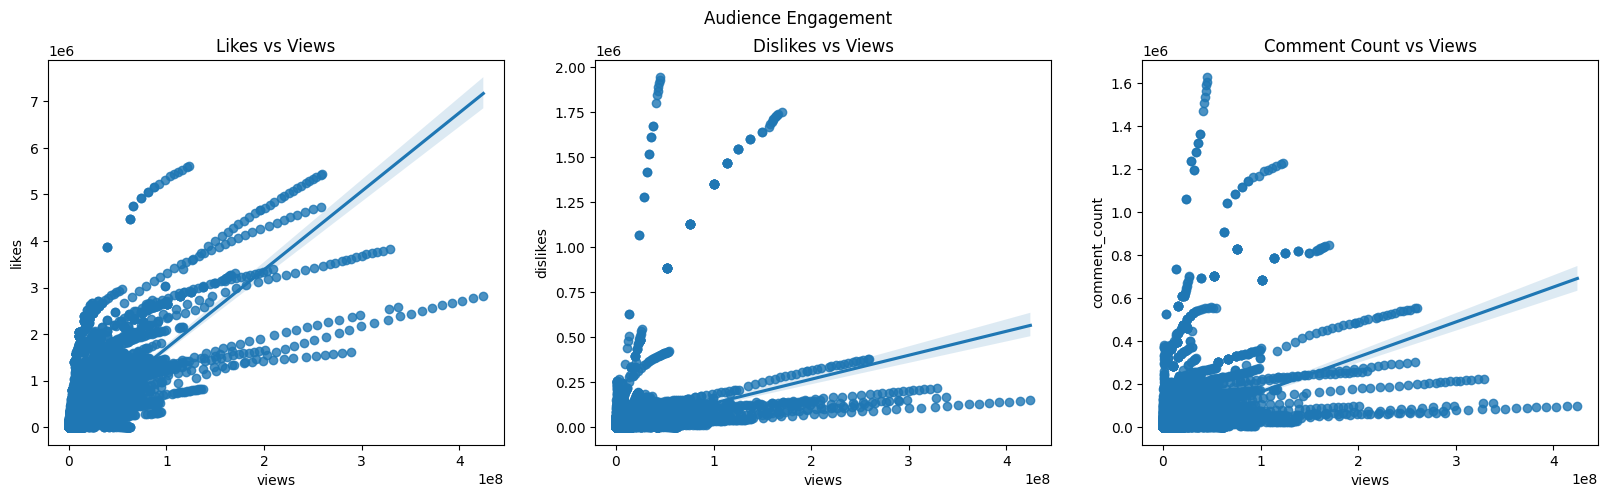

In [99]:
# Correlation between likes, dislikes, comments, and views
fig, axs = plt.subplots(1,3,figsize=(20,5))
fig.suptitle('Audience Engagement')

sns.regplot(ax=axs[0],x='views' , y='likes' , data = dataset)
axs[0].set_title('Likes vs Views')

sns.regplot(ax=axs[1],x='views' , y='dislikes' , data = dataset)
axs[1].set_title('Dislikes vs Views')

sns.regplot(ax=axs[2],x='views' , y='comment_count' , data = dataset)
axs[2].set_title('Comment Count vs Views')

We can clearly see that as views go up, also the likes, deslikes, and comments.

<Axes: >

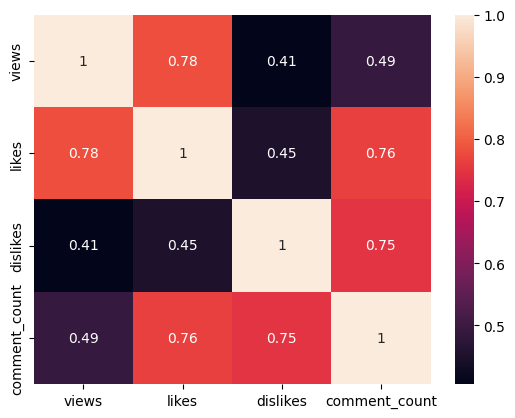

In [110]:
# Calculate correlations
sns.heatmap(dataset[['views','likes','dislikes','comment_count']].corr(), annot=True)

From the correlation table, and corroborating what we saw in the regression graphs, we have positive correlations between views and the other features. This means that as views go up, there's more engagement from the viewers.

## 3. Which channels have the most trendiest shows?

In [118]:
# Check which show has the most number of entries on the dataset
trend_df = dataset.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()
trend_df = trend_df.rename(columns={0:'total_number_videos'})
trend_df.head()

,channel_title,total_number_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528


In [139]:
fig = go.Figure()
fig.add_trace(go.Bar(x=trend_df['channel_title'][0:10] , y=trend_df['total_number_videos'][0:10]))
fig.update_layout(title='Top 10 shows')
fig.show()

In the dataset we can see that the top 3 trendiest shows are:
- The Late Show with Stephen Colbert
- WWE
- Late Night with Seth Meyers

## 4. Does Punctuation in the Title have any relation with views, likes, dislikes?

In [140]:
import string

In [147]:
# get all punctuation chars
punctuation = string.punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [145]:
dataset['title'].head(3)

0                       CapÃ­tulo 12 | MasterChef 2017
1    ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
2             LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA
Name: title, dtype: object

In [148]:
# get the count of punctuation chars in each dataset title

def punctuation_count(text):
    return len([char for char in text if char in string.punctuation])

In [149]:
dataset['count_punctuation'] = dataset['title'].apply(punctuation_count)

Text(0.5, 1.0, 'Dislikes vs Count Punctuation')

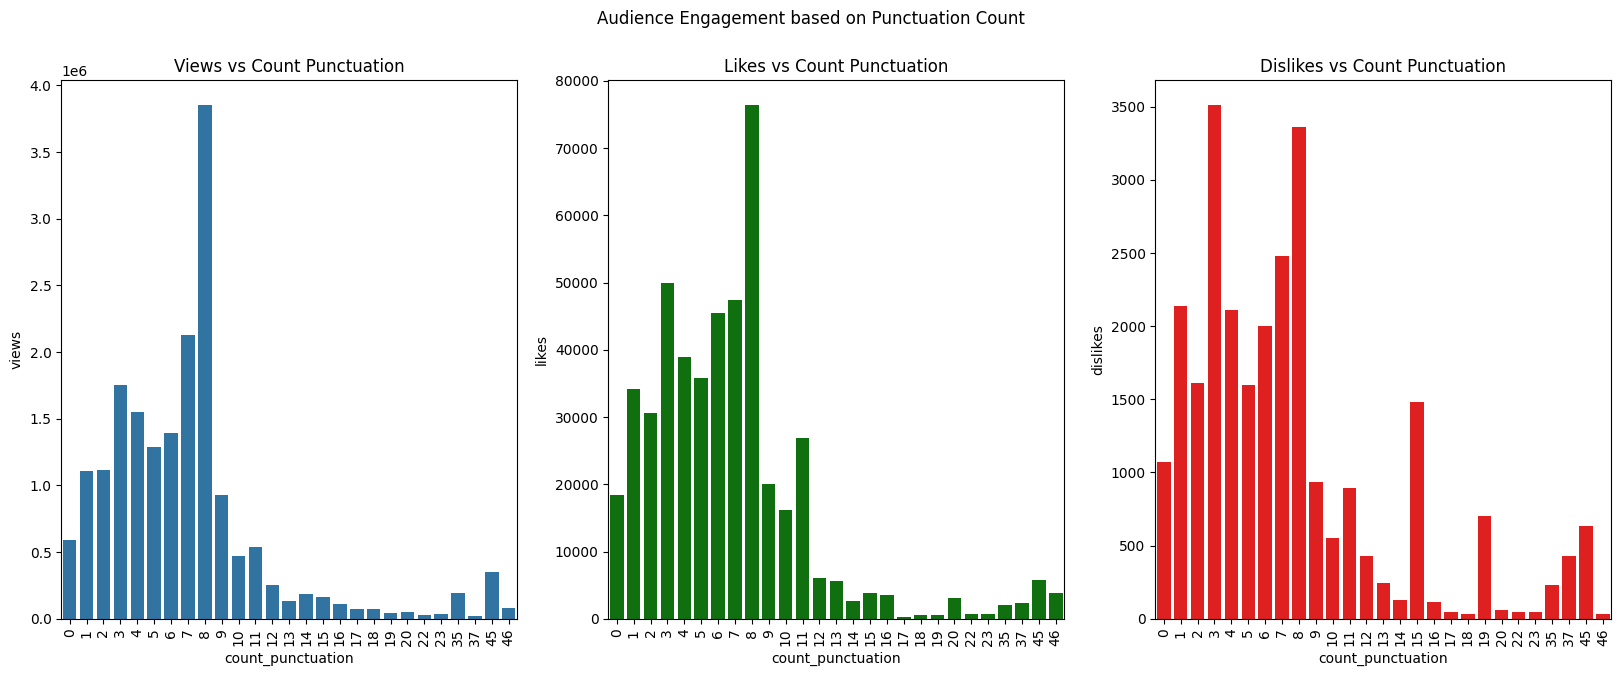

In [176]:
# Correlation between likes, dislikes, views, and count puctuation
fig, axs = plt.subplots(1,3,figsize=(20,7))
fig.suptitle('Audience Engagement based on Punctuation Count')

plt_views = sns.barplot(ax=axs[0],x='count_punctuation' , y='views' , data = dataset, errorbar=None)
plt_views.set_xticklabels(plt_views.get_xticklabels(), rotation=90)
axs[0].set_title('Views vs Count Punctuation')

plt_likes = sns.barplot(ax=axs[1],x='count_punctuation' , y='likes' , data = dataset, errorbar=None, color= 'green')
plt_likes.set_xticklabels(plt_likes.get_xticklabels(), rotation=90)
axs[1].set_title('Likes vs Count Punctuation')

plt_dislikes = sns.barplot(ax=axs[2],x='count_punctuation' , y='dislikes' , data = dataset, errorbar=None, color='red')
plt_dislikes.set_xticklabels(plt_dislikes.get_xticklabels(), rotation=90)
axs[2].set_title('Dislikes vs Count Punctuation')

We can take some conclusions from the plot:<br>
1. videos with 8 punctuation characters have the most number of Views and Likes
2. Most of views, likes, and dislikes, happen in videos with punctuation chars count between 0 and 11
3. Except for dislikes, as the number of puctuation chars count increases, there is less engagement from viewers.